In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

import sklearn as sklearn
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import statsmodels.api as sm
from statsmodels.regression.linear_model import WLS
from statsmodels.genmod.generalized_linear_model import GLM

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Score

In [3]:
df_ktasnr = pd.read_csv('2022_04_05_score.csv', encoding='utf-8', sep=';',
            index_col=0
           )

In [4]:
df_ktasnr

,DRWHID_Num,IPP,Date document,POIDS,PTDVG,SAT,PAPS,PAPM,RVP,QPQS,...,Univentriculaire,Traitement influent sur la coagulation,PLQ,FBG,TP,TCA,PATIENT_NUM,BIRTH_DATE,KT_AGE,result
0,205539,8.002754e+09,2010-01-05,24.1,NaN,81.0,11.0,9.0,NaN,NaN,...,True,True,250.0,2.0,80.0,1.0,205539,2003-01-22,2540,0.0
1,249116,8.003831e+09,2010-01-07,7.0,NaN,100.0,69.0,51.0,NaN,NaN,...,False,False,250.0,2.0,80.0,1.0,249116,1996-01-26,5095,1.0
2,65610,8.004019e+09,2010-01-11,16.9,NaN,97.0,110.0,71.0,NaN,NaN,...,False,True,250.0,2.0,80.0,1.0,65610,2005-06-14,1672,0.0
3,37634,1.406018e+09,2010-01-12,13.0,NaN,88.0,71.0,54.0,NaN,NaN,...,False,False,250.0,2.0,80.0,1.0,37634,2006-03-04,1410,0.0
4,32087,8.003891e+09,2010-01-14,4.0,NaN,88.0,NaN,NaN,NaN,NaN,...,True,True,250.0,2.0,80.0,1.0,32087,2009-11-03,72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,376496,8.007958e+09,2016-07-01,15.0,NaN,92.0,66.0,49.0,9.7,NaN,...,False,True,250.0,2.3,80.0,1.0,376496,2011-12-03,1672,0.0
2976,377416,8.007959e+09,2016-07-01,45.0,7.0,100.0,100.0,78.0,NaN,NaN,...,False,True,78.0,3.0,80.0,1.0,377416,2002-03-20,5217,0.0
2977,366552,8.006989e+09,2016-07-01,3.8,14.0,92.0,44.0,33.0,NaN,NaN,...,True,True,250.0,1.8,80.0,1.0,366552,2016-02-23,129,0.0
2978,209201,8.003878e+09,2016-10-17,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,250.0,2.0,80.0,1.0,209201,2000-11-14,5816,0.0


In [5]:
# Preprocessing

df_CRF = df_ktasnr[['DRWHID_Num', 'IPP', 'Date document', 'KT_AGE', 'POIDS', 'TDK', 'SAT', 'PAPS', 'PAPM', 
                    'SVO2', 'PTDVG', 'QPQS', 'RVP', 'Traitement influent sur la coagulation',
                    'TP', 'TCA', 'FBG', 'PLQ', 'Insuffisance rénale', 'Univentriculaire', 
                    'result']]

df_CRF = df_CRF.rename(columns={'Date document': 'DDK',
                                'PTDVG': 'PTDVG',
                                'Traitement influent sur la coagulation': 'TAC',
                                'Insuffisance rénale': 'IR',
                                'Univentriculaire': 'VU',
                                'result': 'COMPLICATION'})

In [6]:
df_CRF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DRWHID_Num    2980 non-null   int64  
 1   IPP           2888 non-null   float64
 2   DDK           2980 non-null   object 
 3   KT_AGE        2980 non-null   int64  
 4   POIDS         2980 non-null   float64
 5   TDK           2980 non-null   object 
 6   SAT           1868 non-null   float64
 7   PAPS          1414 non-null   float64
 8   PAPM          1494 non-null   float64
 9   SVO2          503 non-null    float64
 10  PTDVG         161 non-null    float64
 11  QPQS          136 non-null    float64
 12  RVP           140 non-null    float64
 13  TAC           2980 non-null   bool   
 14  TP            2980 non-null   float64
 15  TCA           2980 non-null   float64
 16  FBG           2980 non-null   float64
 17  PLQ           2980 non-null   float64
 18  IR            2980 non-null 

In [7]:
df_CRF['TDK'].unique()

array(['DX', 'Autre', 'BOM_TPC', 'Fermeture_CIA_PFO', 'Dilatation_AP',
       'Fermeture_CAP', 'BOM_hors_TPC', 'Valvuloplastie', 'Drainage_PC',
       'Dilatation_COA', 'Extraction_CE', 'Rashkind', 'Dilatation_AS',
       'Fermeture_COLAT', 'Melody', 'Fermeture_Fistule_Coronaire'],
      dtype=object)

In [8]:
df_CRF['TDK'].nunique()

16

In [9]:
# Risk categories

df_CRF['RISK_CAT1'] = (df_CRF['TDK'] == "BOM_TPC")

df_CRF['RISK_CAT2'] = (
    
    (df_CRF['TDK'] == "Fermeture_CIA_PFO") | 
    (df_CRF['TDK'] == "Fermeture_Fistule_Coronaire") | 
    (df_CRF['TDK'] == "Drainage_PC") |
    ((df_CRF['TDK'] == "Fermeture_CAP") & (df_CRF['POIDS'] > 6)) |
    ((df_CRF['TDK'] == "DX") & (df_CRF['KT_AGE'] > 365)) |
    ((df_CRF['TDK'] == "Valvuloplastie") & (df_CRF['KT_AGE'] > 30))
)

df_CRF['RISK_CAT3'] = ( 
    (df_CRF['TDK'] == "Dilatation_COA") | 
    (df_CRF['TDK'] == "Dilatation_AP") | 
    (df_CRF['TDK'] == "Melody") | 
    (df_CRF['TDK'] == "Fermeture_COLAT") | 
    (df_CRF['TDK'] == "BOM_hors_TPC") 
)

df_CRF['RISK_CAT4'] = (
    (df_CRF['TDK'] == "Extraction_CE") |
    ((df_CRF['TDK'] == "DX") & (df_CRF['KT_AGE'] <= 365) & (df_CRF['KT_AGE'] > 30)) |
    ((df_CRF['TDK'] == "Fermeture_CAP") & (df_CRF['POIDS'] <= 6) & (df_CRF['POIDS'] > 3))
)
    
df_CRF['RISK_CAT5'] = (
    
    ((df_CRF['TDK'] == "Valvuloplastie") & (df_CRF['KT_AGE'] <= 30)) |
    (df_CRF['TDK'] == "Dilatation_AS") |
    (df_CRF['TDK'] == "Rashkind") |
    ((df_CRF['TDK'] == "Fermeture_CAP") & (df_CRF['POIDS'] <= 3))     
)


df_CRF['RISK_CAT6'] = (
    (df_CRF['TDK'] == "Autre") |
    ((df_CRF['TDK'] == "DX") & (df_CRF['KT_AGE'] <= 30))
)

In [10]:
df_CRF

,DRWHID_Num,IPP,DDK,KT_AGE,POIDS,TDK,SAT,PAPS,PAPM,SVO2,...,PLQ,IR,VU,COMPLICATION,RISK_CAT1,RISK_CAT2,RISK_CAT3,RISK_CAT4,RISK_CAT5,RISK_CAT6
0,205539,8.002754e+09,2010-01-05,2540,24.1,DX,81.0,11.0,9.0,NaN,...,250.0,False,True,0.0,False,True,False,False,False,False
1,249116,8.003831e+09,2010-01-07,5095,7.0,DX,100.0,69.0,51.0,71.000000,...,250.0,False,False,1.0,False,True,False,False,False,False
2,65610,8.004019e+09,2010-01-11,1672,16.9,DX,97.0,110.0,71.0,64.500000,...,250.0,False,False,0.0,False,True,False,False,False,False
3,37634,1.406018e+09,2010-01-12,1410,13.0,DX,88.0,71.0,54.0,62.500000,...,250.0,False,False,0.0,False,True,False,False,False,False
4,32087,8.003891e+09,2010-01-14,72,4.0,DX,88.0,NaN,NaN,49.000000,...,250.0,False,True,0.0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,376496,8.007958e+09,2016-07-01,1672,15.0,DX,92.0,66.0,49.0,60.333333,...,250.0,False,False,0.0,False,True,False,False,False,False
2976,377416,8.007959e+09,2016-07-01,5217,45.0,DX,100.0,100.0,78.0,NaN,...,78.0,False,False,0.0,False,True,False,False,False,False
2977,366552,8.006989e+09,2016-07-01,129,3.8,DX,92.0,44.0,33.0,70.000000,...,250.0,False,True,0.0,False,False,False,True,False,False
2978,209201,8.003878e+09,2016-10-17,5816,7.0,DX,NaN,NaN,NaN,NaN,...,250.0,False,False,0.0,False,True,False,False,False,False


In [11]:
df_CRF[['RISK_CAT1', 'RISK_CAT2', 'RISK_CAT3', 'RISK_CAT4', 'RISK_CAT5', 'RISK_CAT6']].sum()

RISK_CAT1      21
RISK_CAT2    1468
RISK_CAT3     286
RISK_CAT4     396
RISK_CAT5     285
RISK_CAT6     524
dtype: int64

In [12]:
df_RC = df_CRF[['RISK_CAT1', 'RISK_CAT2', 'RISK_CAT3', 'RISK_CAT4', 'RISK_CAT5', 'RISK_CAT6']]
df_CRF['RC']=df_RC.sum(axis=1)
df_CRF['RC'].nunique()

1

In [13]:
conditions = [
    (df_CRF['RISK_CAT1'] == True),
    (df_CRF['RISK_CAT2'] == True),
    (df_CRF['RISK_CAT3'] == True),
    (df_CRF['RISK_CAT4'] == True),
    (df_CRF['RISK_CAT5'] == True),
    (df_CRF['RISK_CAT6'] == True)
]

choices = ['1', '2', '3', '4', '5', '6']

df_CRF['RISK_CAT'] = np.select(conditions, choices, default='0')

In [14]:
df_CRF

,DRWHID_Num,IPP,DDK,KT_AGE,POIDS,TDK,SAT,PAPS,PAPM,SVO2,...,VU,COMPLICATION,RISK_CAT1,RISK_CAT2,RISK_CAT3,RISK_CAT4,RISK_CAT5,RISK_CAT6,RC,RISK_CAT
0,205539,8.002754e+09,2010-01-05,2540,24.1,DX,81.0,11.0,9.0,NaN,...,True,0.0,False,True,False,False,False,False,1,2
1,249116,8.003831e+09,2010-01-07,5095,7.0,DX,100.0,69.0,51.0,71.000000,...,False,1.0,False,True,False,False,False,False,1,2
2,65610,8.004019e+09,2010-01-11,1672,16.9,DX,97.0,110.0,71.0,64.500000,...,False,0.0,False,True,False,False,False,False,1,2
3,37634,1.406018e+09,2010-01-12,1410,13.0,DX,88.0,71.0,54.0,62.500000,...,False,0.0,False,True,False,False,False,False,1,2
4,32087,8.003891e+09,2010-01-14,72,4.0,DX,88.0,NaN,NaN,49.000000,...,True,0.0,False,False,False,True,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,376496,8.007958e+09,2016-07-01,1672,15.0,DX,92.0,66.0,49.0,60.333333,...,False,0.0,False,True,False,False,False,False,1,2
2976,377416,8.007959e+09,2016-07-01,5217,45.0,DX,100.0,100.0,78.0,NaN,...,False,0.0,False,True,False,False,False,False,1,2
2977,366552,8.006989e+09,2016-07-01,129,3.8,DX,92.0,44.0,33.0,70.000000,...,True,0.0,False,False,False,True,False,False,1,4
2978,209201,8.003878e+09,2016-10-17,5816,7.0,DX,NaN,NaN,NaN,NaN,...,False,0.0,False,True,False,False,False,False,1,2


In [15]:
# Hemodynamic Vulnerability Indicators

df_CRF['VU_DESAT']=((df_CRF['SAT'] < 78) & (df_CRF['VU']==True))
df_CRF['DESAT']=((df_CRF['SAT'] < 95) & (df_CRF['VU']==False))

df_CRF['VU_SVO2_BASSE']=((df_CRF['SVO2'] < 50) & (df_CRF['VU']==True))
df_CRF['SVO2_BASSE']=((df_CRF['SVO2'] < 60) & (df_CRF['VU']==False))

df_CRF['VU_PA']=((df_CRF['PAPM'] >= 17) & (df_CRF['VU'] == True))

df_CRF['PAPS_ELEVEE']=((df_CRF['PAPS'] >= 45) & (df_CRF['VU']==False))

df_CRF['PTDVG_ELEVEE']=(df_CRF['PTDVG'] >= 18)

df_CRF['QPQS_ELEVE']=(df_CRF['QPQS'] >= 1.5)

df_CRF['RVP_ELEVEE']=(df_CRF['RVP'] >= 3)

df_HD = df_CRF[['VU_DESAT', 'DESAT', 'VU_SVO2_BASSE', 'SVO2_BASSE',
                'VU_PA', 'PAPS_ELEVEE', 'PTDVG_ELEVEE', 'QPQS_ELEVE', 'RVP_ELEVEE']]

df_CRF['VUL_HD']=df_HD.sum(axis=1)

In [16]:
df_HD.sum()

VU_DESAT          34
DESAT            379
VU_SVO2_BASSE      4
SVO2_BASSE        68
VU_PA             75
PAPS_ELEVEE      408
PTDVG_ELEVEE      34
QPQS_ELEVE       102
RVP_ELEVEE       106
dtype: int64

In [17]:
df_CRF['VULN_AUTRE']=( (df_CRF['TCA'] > 1.18) | (df_CRF['TP'] < 70) | 
                      (df_CRF['FBG'] < 1.5) | (df_CRF['FBG'] > 3.5) | 
                      (df_CRF['VU'] == True) | (df_CRF['IR'] == True)
                     )

df_CRF['COAG_DIS']=( 
    (df_CRF['TAC'] == False) &
    ( (df_CRF['TCA'] > 1.18) | (df_CRF['TP'] < 70) | (df_CRF['FBG'] < 1.5) | (df_CRF['FBG'] > 3.5) )
                   )

In [18]:
data = df_CRF[['IPP', 'DDK', 
               'RISK_CAT1', 'RISK_CAT2', 'RISK_CAT3', 'RISK_CAT4', 'RISK_CAT5', 'RISK_CAT6',
               'RISK_CAT',
               'VUL_HD', 
               'IR', 'VU', 'COAG_DIS', 
               'COMPLICATION']]

# Booleans
data['VUL_HD0'] = (data['VUL_HD'] == 0)
data['VUL_HD1'] = (data['VUL_HD'] == 1)
data['VUL_HD2'] = (data['VUL_HD'] == 2)
data['VUL_HD3'] = (data['VUL_HD'] > 2)

In [19]:
# To have a look
#data.to_csv('reduced_model_data_5avril.csv', sep=';', encoding='utf-8')

In [20]:
# IMPACT reduced model

data['RISK'] = (
    data['RISK_CAT1']*1 +
    data['RISK_CAT2']*1.88 + 
    data['RISK_CAT3']*3.89 +
    data['RISK_CAT4']*3.87 +
    data['RISK_CAT5']*8.91 +
    data['RISK_CAT6']*12.80 +
    data['VUL_HD0']*1 +
    data['VUL_HD1']*1.21 +
    data['VUL_HD2']*1.73 +
    data['VUL_HD3']*2.45 +
    data['COAG_DIS']*2.42 +
    data['IR']*2.16 +
    data['VU']* 1.23
)

# LogReg and ROC curve (Sklearn)

In [22]:
# Set VUL_HD in 4 levels, like in the IMPACT score
print(data['VUL_HD'].nunique())
data['VUL_HD'][data['VUL_HD'] > 3] = 3
print(data['VUL_HD'].nunique())

6
4


In [23]:
# Data
df = data[[  'RISK_CAT',
             'VUL_HD',
             'IR',
             'VU',
             'COAG_DIS',
             'COMPLICATION']]

In [24]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,VUL_HD,IR,VU,COAG_DIS,COMPLICATION
VUL_HD,1.000000,-0.005769,-0.023675,0.032148,0.055389
IR,-0.005769,1.000000,-0.020463,0.028015,0.020503
VU,-0.023675,-0.020463,1.000000,-0.018041,0.097188
COAG_DIS,0.032148,0.028015,-0.018041,1.000000,0.047400
COMPLICATION,0.055389,0.020503,0.097188,0.047400,1.000000


In [25]:
df.head()

,RISK_CAT,VUL_HD,IR,VU,COAG_DIS,COMPLICATION
0,2,0,False,True,False,0.0
1,2,1,False,False,False,1.0
2,2,1,False,False,False,0.0
3,2,2,False,False,False,0.0
4,4,1,False,True,False,0.0


In [26]:
# To transform COMPLICATION int in category

df_CRF['COMPLICATION'][df_CRF['COMPLICATION'] > 0] = 1
df_CRF['COMPLICATION'] = df_CRF['COMPLICATION'].astype('category')

In [27]:
# x = explanatory variables, y = variable to predict

x = df.drop('COMPLICATION',axis = 1)
y = df.COMPLICATION

In [28]:
# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
# Fit LogReg
logreg = LogisticRegression(class_weight='balanced')

# Fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Prediction: y_pred (to get accuracy and confusion matrix)
y_pred=logreg.predict(x_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
print('Accuracy:', accuracy_percentage)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Accuracy: 65.1006711409396
[[537 294]
 [ 18  45]]


In [31]:
# Probability: y_prob (to get AUROC)
y_prob=logreg.predict_proba(x_test)

df_y_prob = pd.DataFrame(y_prob, dtype='float')

y_prob_1 = df_y_prob[[1]]

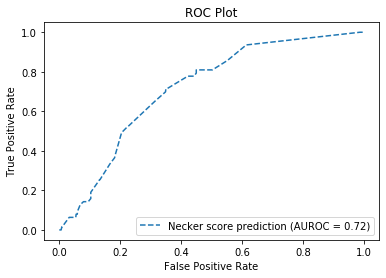

In [32]:
# Plot the ROC curve of IMPACT-score-Necker

sklearn.metrics.roc_curve(y_test, y_prob_1)
r_auc = roc_auc_score(y_test, y_prob_1)
fpr, tpr, _ = roc_curve(y_test, y_prob_1)

plt.plot(fpr, tpr, linestyle='--', label='Necker score prediction (AUROC = %0.2f)' % r_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

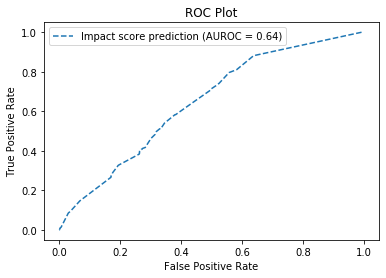

In [34]:
# Plot the ROC curve of IMPACT-score
df_impact = data[['IPP', 'DDK', 'COMPLICATION', 'RISK']]

df_impact.loc[:,'RISK'] = df_impact['RISK']

impact_true = df_impact['COMPLICATION'].to_list()
impact_true = list(map(bool,impact_true))
impact_score = df_impact['RISK'].to_list()

sklearn.metrics.roc_auc_score(impact_true, impact_score)
sklearn.metrics.roc_curve(impact_true, impact_score)
impact_r_auc = roc_auc_score(impact_true, impact_score)
impact_r_fpr, impact_r_tpr, _ = roc_curve(impact_true, impact_score)

impact_r_auc

plt.plot(impact_r_fpr, impact_r_tpr, linestyle='--',
         label='Impact score prediction (AUROC = %0.2f)' % impact_r_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

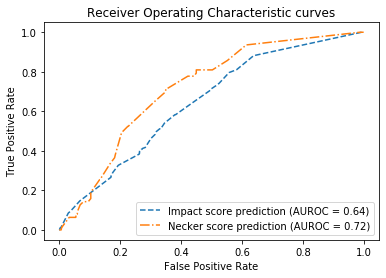

In [35]:
# Compare the ROV curves
plt.plot(impact_r_fpr, impact_r_tpr, linestyle='--',
         label='Impact score prediction (AUROC = %0.2f)' % impact_r_auc)

plt.plot(fpr, tpr, linestyle='-.', 
         label='Necker score prediction (AUROC = %0.2f)' % r_auc)


plt.title("Receiver Operating Characteristic curves")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 

# To save the fig as pdf file
date = datetime.now().strftime("%Y_%m_%d-%I-%M-%S_%p")
plt.savefig(f"{date}_roc.pdf", bbox_inches='tight')

## STATSMODELS

In [36]:
## Create the dataframe for STATSMODELS
dfy = y.to_frame(name='COMPLICATION')
data = pd.merge(x, dfy, left_index=True, right_index=True)

In [38]:
# Data
mydata = data

# Format data
mydata = mydata.astype(int)
x = mydata[['RISK_CAT', 
            'VUL_HD', 
            'IR', 
            'VU', 
            'COAG_DIS', 
            ]]

# Check that every variable is usefull
print(x.std())

RISK_CAT    1.581338
VUL_HD      0.741282
IR          0.087528
VU          0.323202
COAG_DIS    0.103085
dtype: float64


In [39]:
y = mydata[['COMPLICATION']]
y = y.astype("category")
y = y['COMPLICATION'].cat.codes

x_stat = sm.add_constant(x)

model = sm.Logit(y, x_stat)
result = model.fit()

print('********************************')
print('LOG REG RESULTS WITH STATSMODEL')
result.summary()

Optimization terminated successfully.
         Current function value: 0.245229
         Iterations 7
********************************
LOG REG RESULTS WITH STATSMODEL


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2980
Model:                          Logit   Df Residuals:                     2974
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                 0.04101
Time:                        14:47:58   Log-Likelihood:                -730.78
converged:                       True   LL-Null:                       -762.04
Covariance Type:            nonrobust   LLR p-value:                 3.682e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6558      0.195    -18.755      0.000      -4.038      -3.274
RISK_CAT       0.2167      0.044      4.928      0.000       0.131       0.303
VUL_HD         0.2712      0.087      3.130      0.002       0.101       0.441
IR             0.8741      0.633      1.380      0.168      -0.367       2.116
VU             0.8838      0.177      5.004      0.000       0.538       1.230
COAG_DIS       1.2407      0.468      2.652      0.008       0.324       2.158
==============================================================================
"""

In [40]:
#np.exp(result.params)

In [41]:
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
#print(np.exp(conf))
res_sum = np.exp(conf)

In [42]:
print('********************************')
print('ODDs RATIO WITH STATSMODEL')
res_sum

********************************
ODDs RATIO WITH STATSMODEL


,5%,95%,Odds Ratio
const,0.017635,0.037864,0.025841
RISK_CAT,1.139403,1.353699,1.241938
VUL_HD,1.106662,1.554242,1.311496
IR,0.692486,8.295548,2.396780
VU,1.711965,3.421199,2.420118
COAG_DIS,1.382337,8.651426,3.458206


In [43]:
res_sum.to_csv(f'{date}_coefficients_statsmodel.csv', sep=';', encoding='utf-8')

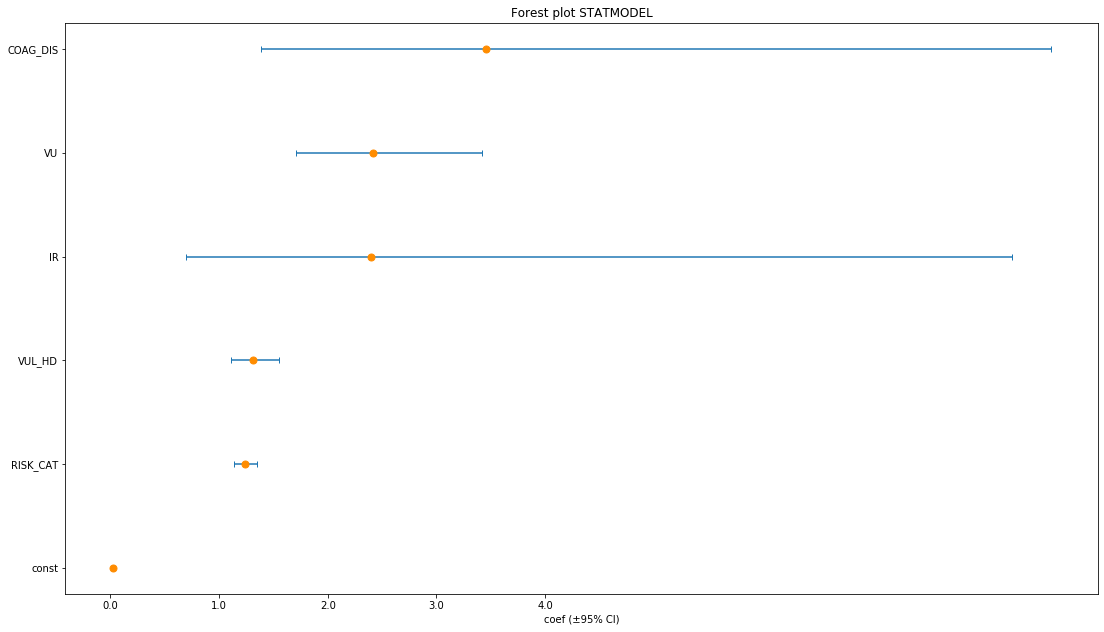

In [44]:
# Error intervals
lower_error = (res_sum['Odds Ratio'] - res_sum['5%']).values
upper_error = (res_sum['95%'] - res_sum['Odds Ratio']).values
errors = [lower_error, upper_error]

figure = plt.figure()

plt.title('Forest plot STATMODEL')

plt.errorbar(y=range(len(res_sum)),
             x=res_sum['Odds Ratio'].values, 
             xerr=errors, 
             fmt='o',
             capsize=3, markersize=7, mfc="darkorange", mec="darkorange")
 
plt.yticks(range(len(res_sum)), res_sum.index.tolist())
plt.xticks(np.linspace(0,4,5), np.linspace(0,4,5))

plt.xlabel('coef (±95% CI)')

figure.set_size_inches(18.5, 10.5)

plt.show()

# To save plot in pdf file
figure.savefig(f'{date}_forestplot_statmodel.pdf')

In [45]:
# For more clarity we can plot Forest plot without IR

res_sum = res_sum.drop(['IR'], axis=0)

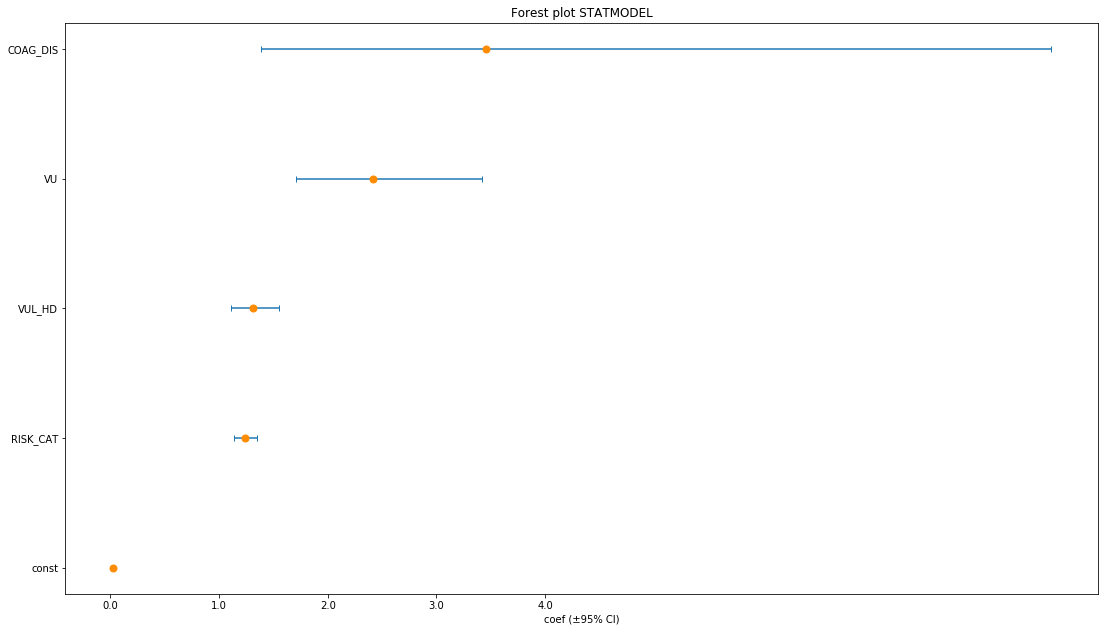

In [46]:
# Error intervals
lower_error = (res_sum['Odds Ratio'] - res_sum['5%']).values
upper_error = (res_sum['95%'] - res_sum['Odds Ratio']).values
errors = [lower_error, upper_error]

figure = plt.figure()

plt.title('Forest plot STATMODEL')

plt.errorbar(y=range(len(res_sum)),
             x=res_sum['Odds Ratio'].values, 
             xerr=errors, 
             fmt='o',
             capsize=3, markersize=7, mfc="darkorange", mec="darkorange")
 
plt.yticks(range(len(res_sum)), res_sum.index.tolist())
plt.xticks(np.linspace(0,4,5), np.linspace(0,4,5))

plt.xlabel('coef (±95% CI)')

figure.set_size_inches(18.5, 10.5)

plt.show()

# To save plot in pdf file
figure.savefig(f'{date}_forestplot_statmodel_without_IR.pdf')